In [1]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set matplotlib as inline
%matplotlib inline 

# Equality of two means

Imagine the following situation: a gaming company measures the happiness of its users by how long they played a given week. 
- If the users play 0 hours, they are not very engaged and likely not happy about the game
- If the users play 10 hours, they're likely very happy about the game.
- The company caps the playing time at 10 hours. 

They introduced a new feature and hope it will increase the playing time. 

## Population simulation
Note: in practice, you'd get a table with data about your sample. Here we generate it artificially

In [2]:
# df = pd.DataFrame()
# df['value'] = stats.powerlaw.rvs(0.9, size=10000)
# df['value'].hist(bins=100)

Control 3.35, treatment 4.06


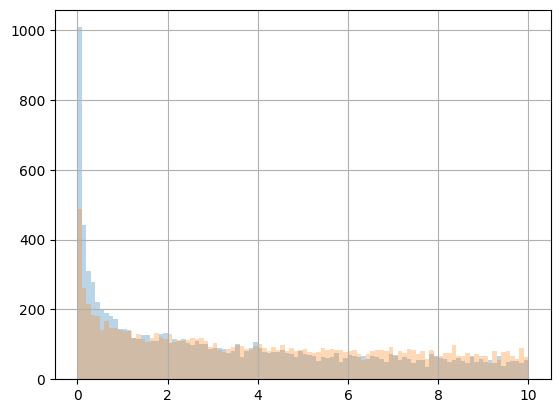

In [3]:
# Simulate two populations
population_size = 10000
population_control = pd.DataFrame()
population_control['playing_time'] = 10 * stats.powerlaw.rvs(0.5, size=population_size)

population_treatment = pd.DataFrame()
population_treatment['playing_time'] = 10 * stats.powerlaw.rvs(0.68, size=population_size)
# Plot
population_control['playing_time'].hist(bins=100, alpha=0.3)
population_treatment['playing_time'].hist(bins=100, alpha=0.3)

print("Control {:.2f}, treatment {:.2f}".format(population_control['playing_time'].mean(), population_treatment['playing_time'].mean()))


## Sampling
The company decides to test the feature on 600 users, they send half of them to the new experience (treatment) and half to the old one (control). They compare the average playing time


    The average playing time is 3.21 in control and 3.97 in treatment. Is that difference statistically significant?
    


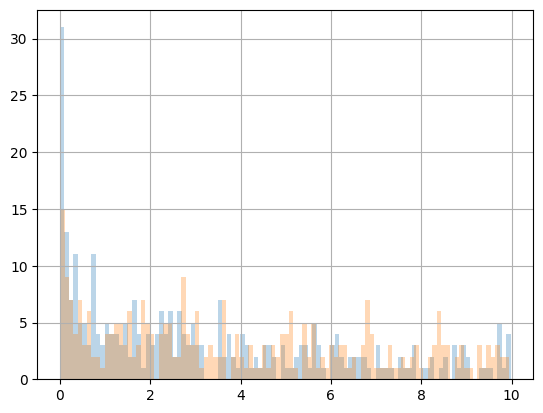

In [4]:
# Sampling
sample_size = 300
sample_control = population_control.sample(n=sample_size)
sample_treatment = population_treatment.sample(n=sample_size)
sample_control['playing_time'].hist(bins=100, alpha=0.3)
sample_treatment['playing_time'].hist(bins=100, alpha=0.3)
print(
    """
    The average playing time is {:.2f} in control and {:.2f} in treatment. Is that difference statistically significant?
    """.format( 
        sample_control['playing_time'].mean(), 
        sample_treatment['playing_time'].mean()
    )
)

## Test
To distinguish the noise from the signal, the company's data analyst runs a statistical test on the two means

Note: Scipy is a python library that has many statistical tests: Looking at the documentation [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests), we find that we want to use a t-test [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [5]:
stats.ttest_ind(sample_control['playing_time'], sample_treatment['playing_time'], equal_var=False)

Ttest_indResult(statistic=-3.213042174765968, pvalue=0.0013840097274891204)

**Questions**
1. What is the null hypothesis here? What is the alternative hypothesis?
1. What is our metric? What is its value in our sample?
1. What is the p-value? What do you decide?
1. Look at the parameters of the function we used, what does `equal_var` mean? Why did we set it to False?
1. Imagine you want to test whether the average playing time is higher, how would you modify the test?
1. Have a look at other statistical tests scipy provide!